In [1]:
import sklearn
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score
def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    # ROC-AUC 추가 
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))  #위치정하는 것 {2: }-> 두번째
    


In [10]:
import pandas as pd
import numpy as np

from sklearn import datasets
data=datasets.load_diabetes() 
data.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])

In [22]:
#data,target,feature_names, 로 데이터 프레임 만들기 
#1 그냥 붙이기 
df=pd.DataFrame(data=data['data'], columns= data['feature_names'])
df['target']=data['target']

#2 concat 사용 
pd.concat([pd.DataFrame(data=data['data'], columns= data['feature_names']),
               pd.Series(data['target'])],axis=1)

df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


In [28]:
#단순선형회귀 -> y절편 , 기울기 
from sklearn.linear_model import LinearRegression 
x= df['bmi'].values.reshape(-1, 1)
y= df['target']

lr=LinearRegression()
lr.fit(x,y)
lr.coef_
lr.intercept_ 

152.13348416289617

In [47]:
from sklearn.linear_model import LinearRegression 
x= df[['bmi']]
y= df['target']

lr=LinearRegression()
lr.fit(x,y)
lr.coef_
lr.intercept_ 

152.13348416289617

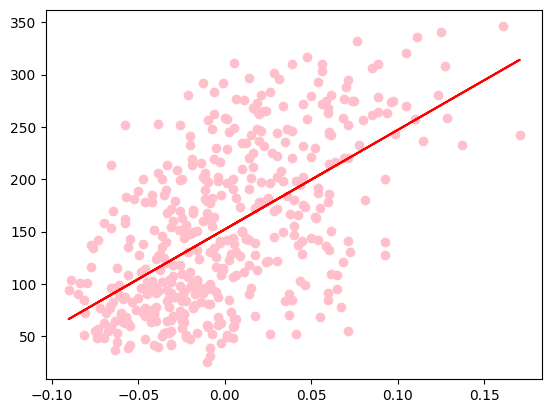

In [51]:
import matplotlib.pyplot as plt
#산점도 
plt.scatter(x,y,c='pink')

#기울기와 y절편으로 선그래프 
plt.plot(x,lr.coef_*x+lr.intercept_, c='red' )

<Axes: xlabel='bmi', ylabel='target'>

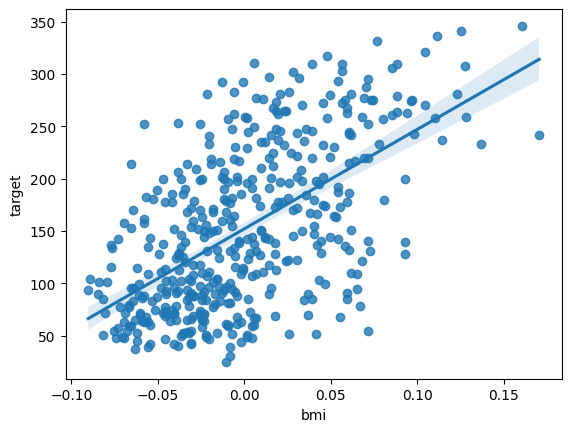

In [58]:
#seaborn 으로 한번에 회귀 함수 그래프 그리기
import seaborn as sns
sns.regplot(data=df, x='bmi', y='target')

In [66]:
#로그변환 
a=np.log1p(df['target']) #= np.log(df['target']+1)
#다시 복원 
np.expm1(a) #1을 넣는이유 : 0으로 되는것을 막아주기 위해 

0      151.0
1       75.0
2      141.0
3      206.0
4      135.0
       ...  
437    178.0
438    104.0
439    132.0
440    220.0
441     57.0
Name: target, Length: 442, dtype: float64

# 비지도학습

## 차원축소

In [69]:
np.arange(24).reshape(6,4).shape #2차원  
np.arange(24).reshape(2,3,4).shape #3차원 

(2, 3, 4)

### PCA

In [92]:
iris=load_iris()
iris

df=pd.DataFrame(iris.data, columns= iris.feature_names)
df['target']=iris.target
df['target'].replace({0:'setosa',1:'versicolor',2:'viginica'}, inplace= True) 
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


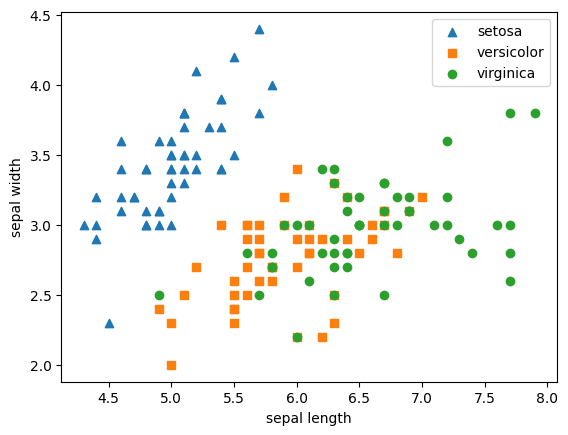

In [95]:
#setosa는 세모, versicolor는 네모, virginica는 동그라미로 표현
markers=['^', 's', 'o']

irisDF=df.copy()
irisDF.columns=['sepal_length','sepal_width','petal_length','petal_width','target']
irisDF['target']=iris.target

#setosa의 target 값은 0, versicolor는 1, virginica는 2. 각 target 별로 다른 shape으로 scatter plot 
for i, marker in enumerate(markers):
    x_axis_data = irisDF[irisDF['target']==i]['sepal_length']
    y_axis_data = irisDF[irisDF['target']==i]['sepal_width']
    plt.scatter(x_axis_data, y_axis_data, marker=marker,label=iris.target_names[i])

plt.legend()
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.show() 


원본 그래프 겹치는 부분이 많음 - 차원축소 해주기

(150, 2)


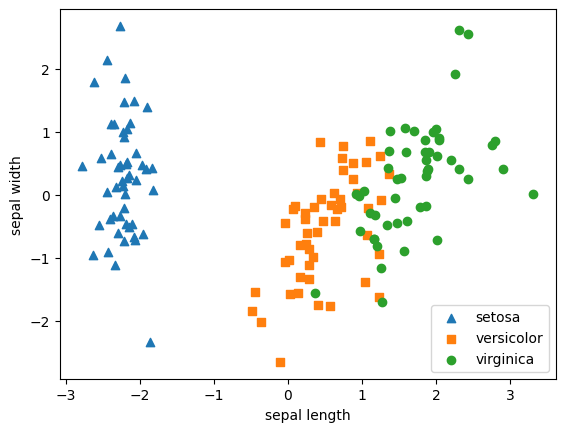

In [126]:
# scale -> PCA 
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
scaled=scaler.fit_transform(df.iloc[:,:4])

from sklearn.decomposition import PCA
pca=PCA(n_components=2)
pca.fit(scaled)
df_pca=pca.transform(scaled)
print(df_pca.shape) #n_components=2 차원축소 

pca_columns=['pca_component_1','pca_component_2']
irisDF_pca=pd.DataFrame(df_pca, columns=pca_columns)
irisDF_pca['target']=iris.target

markers=['^', 's', 'o']
for i, marker in enumerate(markers):
    x_axis_data = irisDF_pca[irisDF_pca['target']==i]['pca_component_1']
    y_axis_data = irisDF_pca[irisDF_pca['target']==i]['pca_component_2']
    plt.scatter(x_axis_data, y_axis_data, marker=marker,label=iris.target_names[i])

plt.legend()
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.show() 


위에 원본 그래프랑 비교하면 훨씬 분류가 잘됨 ver, vir 조금 겹치지만 나아짐

In [102]:
scaled.shape #본래랑 비교 

(150, 4)

In [105]:
#pca component별로 원본 데이터의 변동성
#PCA component별로 차지하는 변동성 비율 
pca.explained_variance_ratio_

array([0.72962445, 0.22850762])

In [120]:
#원본 randomforest
from sklearn.model_selection import cross_val_score
rf_clf= RandomForestClassifier()

x=df.iloc[:, :-1]
y=df.iloc[:,-1]
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.3)
rf_clf.fit(x_train, y_train)
pred=rf_clf.predict(x_test)

acc= accuracy_score(y_test, pred)
acc

score=cross_val_score(rf_clf,x,y,cv=5, scoring='accuracy') #교차검증 개별 정확도
np.mean(score)

0.9533333333333334

In [119]:
#pca차원축소 randomforest 
rf_clf= RandomForestClassifier()

x=df_pca
y=df.iloc[:,-1]
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.3)
rf_clf.fit(x_train, y_train)
pred=rf_clf.predict(x_test)

acc= accuracy_score(y_test, pred)
acc

score=cross_val_score(rf_clf,x,y,cv=5, scoring='accuracy') #교차검증 개별 정확도
np.mean(score)

0.8933333333333333

차원축소 하니까 acc 정확도  95% -> 86% 확률 떨어짐 
cross_val_score 교차검증할때마다 정확도 

## 신용카드 고객 데이터셋 pca

In [139]:
#의미없는 첫행 제거 , 기존 id제거 
import pandas as pd
df=pd.read_excel('pca_credit_card.xls', header=1 ).iloc[:,1:]
df.head(3)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0


<Axes: >

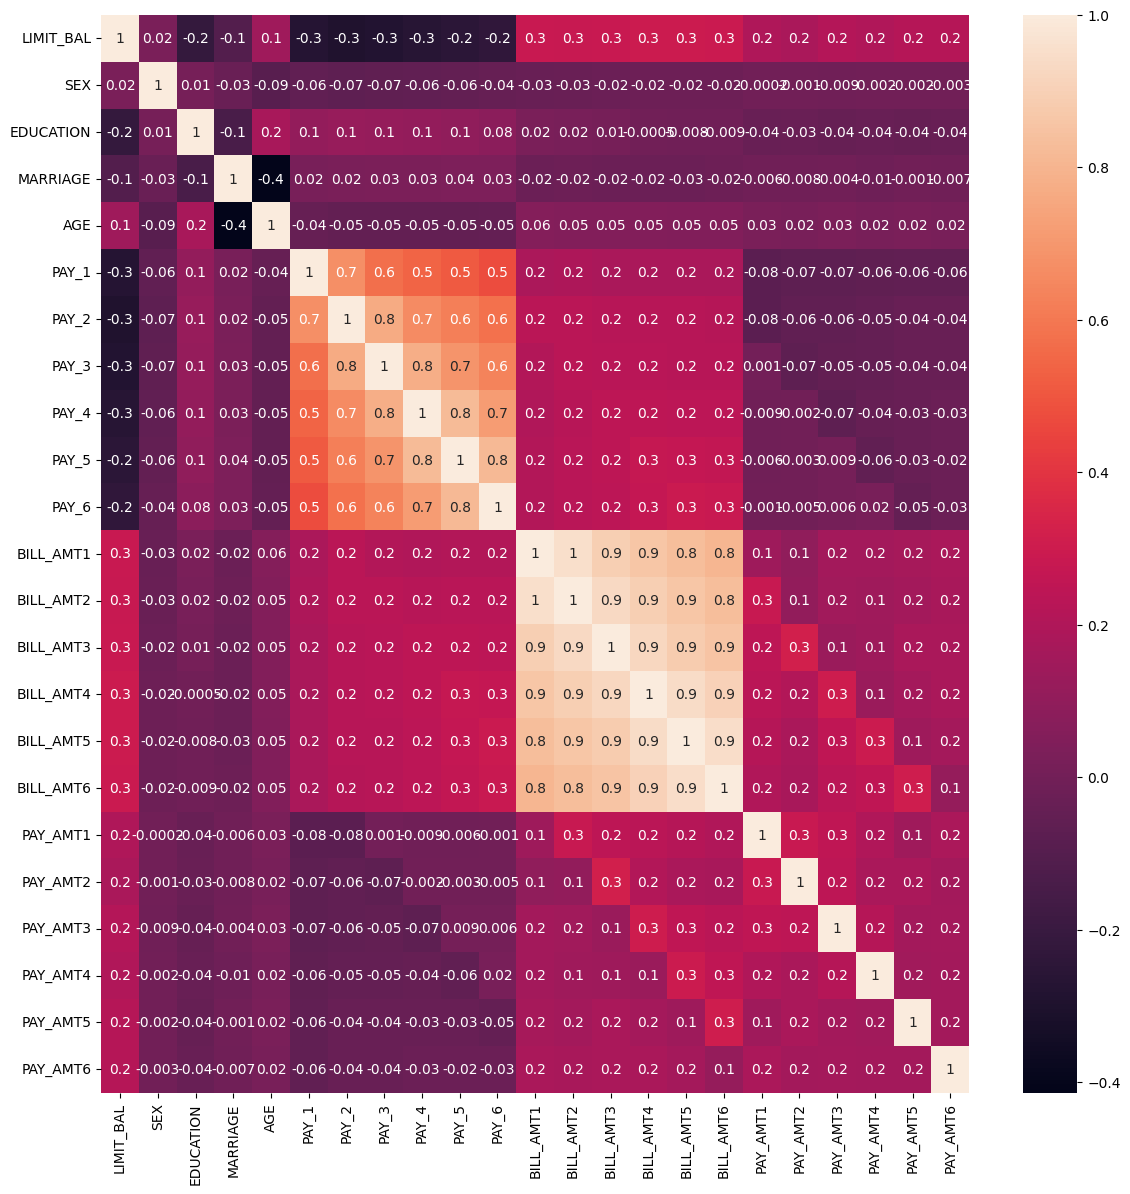

In [143]:
df.rename(columns={'PAY_0':'PAY_1','default payment next month':'default'}, inplace=True)
y= y_target = df['default']
X= X_features = df.drop('default', axis=1) 
#상관관계 
corr=X_features.corr()
corr
plt.figure(figsize=(14,14))
sns.heatmap(corr, annot=True, fmt='.1g')
# 진한것이 상관도가 낮음 !! 연한것을 찾기 !! 

높은 상관도를 가진 속성을 찾아 주성분 pca변환 
- Bill_Amt1-6, Pay1-6 상관도 높음
- Bill 의 6개 -> 2개로 차원축소

In [155]:
col_bill=['BILL_AMT'+str(i) for i in range(1,7)]

scaler=StandardScaler()
df_cols_scaled=scaler.fit_transform(X[col_bill])
pca= PCA(n_components=2)
pca.fit(df_cols_scaled)
pca.explained_variance_ratio_ #pca component 별 변동성 , 90+5 =95% 

array([0.90555253, 0.0509867 ])

pca1 축으로 90이상의 변동성을 수용할 정도로 6개의 상관도 매우 높음

### 원본 데이터 vs 컴포넌트 pca 
- 랜덤포레스트를 이용해 cv=5교차 검증으로 예측 비교

In [154]:
#원본 
from sklearn.model_selection import cross_val_score
rcf= RandomForestClassifier(n_estimators=300, random_state=156)

score=cross_val_score(rcf,X,y,cv=5, scoring='accuracy') #교차검증 개별 정확도
np.mean(score) #81% 

0.8161000000000002

In [157]:
#pca 
#원본에 standardscaler 적용
scaler=StandardScaler()
df_scaled=scaler.fit_transform(X)

#6개의 컴포넌트를 가진  pca 수행 후 cross로 분류예측 
pca= PCA(n_components=6)
df_pca=pca.fit_transform(df_scaled)
scores_pca=cross_val_score(rcf,df_pca,y,cv=5, scoring='accuracy') #교차검증 개별 정확도
np.mean(scores_pca) 

0.7973

- 약 1/4 수준인 PCA 컴포넌트만으로 분류예측한 결과 원본보다 약 1-2 퍼 성능저하 일어남. 
- 이정도 예측 성능 유지는 PCA의 뛰어난 압축능력을 보여줌
- 컴퓨터 비전 , 특히 얼굴 인식에 많이 사용 

## LDA 

In [159]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

iris = load_iris()
iris_scaled = StandardScaler().fit_transform(iris.data)

lda = LinearDiscriminantAnalysis(n_components=2)
# iris.target ->지도학습이라 결정값 입력 
lda.fit(iris_scaled, iris.target)
iris_lda = lda.transform(iris_scaled)
print(iris_lda.shape)


(150, 2)


LDA 변환

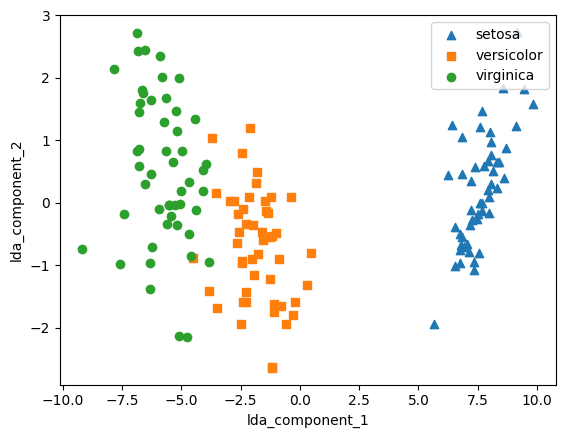

In [160]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

lda_columns=['lda_component_1','lda_component_2']
irisDF_lda = pd.DataFrame(iris_lda,columns=lda_columns)
irisDF_lda['target']=iris.target

#setosa는 세모, versicolor는 네모, virginica는 동그라미로 표현
markers=['^', 's', 'o']

#setosa의 target 값은 0, versicolor는 1, virginica는 2. 각 target 별로 다른 shape으로 scatter plot
for i, marker in enumerate(markers):
    x_axis_data = irisDF_lda[irisDF_lda['target']==i]['lda_component_1']
    y_axis_data = irisDF_lda[irisDF_lda['target']==i]['lda_component_2']

    plt.scatter(x_axis_data, y_axis_data, marker=marker,label=iris.target_names[i])

plt.legend(loc='upper right')
plt.xlabel('lda_component_1')
plt.ylabel('lda_component_2')
plt.show()

(150, 2)


Text(0, 0.5, 'TruncatedSVD Comp2')

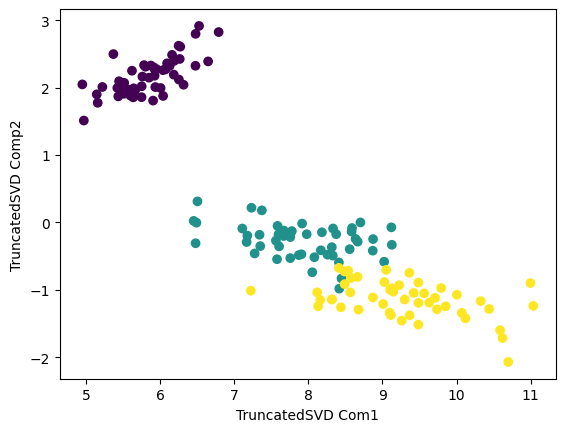

In [170]:
from sklearn.decomposition import TruncatedSVD, PCA
tsvd= TruncatedSVD(n_components=2)
tsvd.fit(iris.data)
df_tsvd =tsvd.transform(iris.data)
print(df_tsvd.shape)

plt.scatter(x=df_tsvd[:,0], y=df_tsvd[:,1], c=iris.target)
plt.xlabel('TruncatedSVD Com1')
plt.ylabel('TruncatedSVD Comp2')

C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\decomposition\_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


Text(0, 0.5, 'NMF Component2')

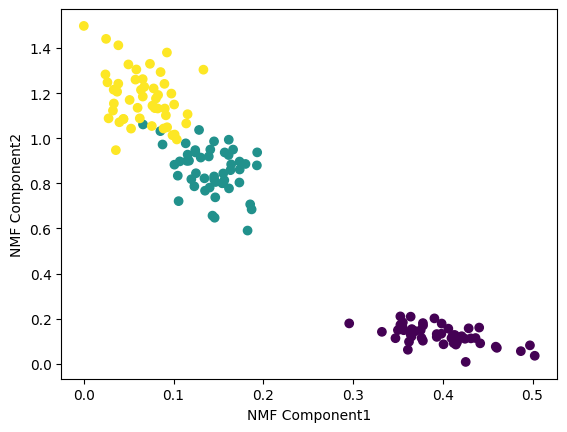

In [187]:
from sklearn.decomposition import NMF
iris=load_iris()
iris_ftrs=iris.data
nmf= NMF(n_components=2)
nmf.fit(iris_ftrs)
iris_nmf=nmf.transform(iris_ftrs)
plt.scatter(x=iris_nmf[:,0], y=iris_nmf[:,1], c=iris.target)
plt.xlabel('NMF Component1')
plt.ylabel('NMF Component2')

# 군집화

In [185]:
iris_df=iris.data
iris_df

from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=3, random_state=0)
kmeans.fit(iris_df)

kmeans.labels_
pd.Series(kmeans.labels_).value_counts()

C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0    62
1    50
2    38
dtype: int64

In [181]:
pca=PCA(n_components=2)
scaled_iris=pca.fit_transform(iris_df)
kmeans=KMeans(n_clusters=3, random_state=0)
kmeans.fit(scaled_iris)

pd.Series(kmeans.labels_).value_counts()

C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


2    61
0    50
1    39
dtype: int64

In [182]:
kmeans=KMeans(n_clusters=4, random_state=0)
kmeans.fit(scaled_iris)

pd.Series(kmeans.labels_).value_counts()

C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0    50
1    49
2    28
3    23
dtype: int64